<a href="https://colab.research.google.com/github/serious22/Minor_Project-on-Data_Privacy/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/adult.data')
print(df.head(5))

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [ ]:
# Define correct column names based on the dataset documentation
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

# Load the dataset with column names
df = pd.read_csv('adult.data', header=None, names=column_names)

# Strip leading/trailing whitespace from all columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Check the first few rows to ensure it's cleaned
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


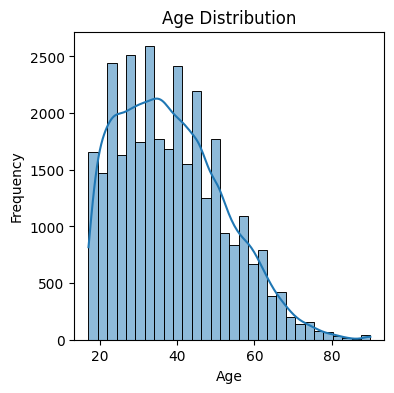

In [ ]:
# age distribution
plt.figure(figsize=(4,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

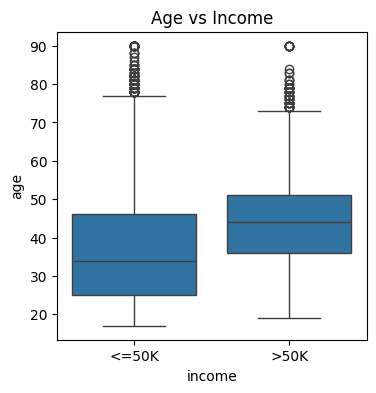

In [ ]:
# Boxplot of age vs. income
plt.figure(figsize=(4,4))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age vs Income')
plt.show()

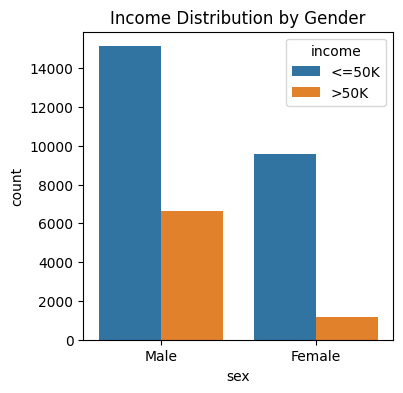

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x='sex', hue='income', data=df)
plt.title('Income Distribution by Gender')
plt.show()

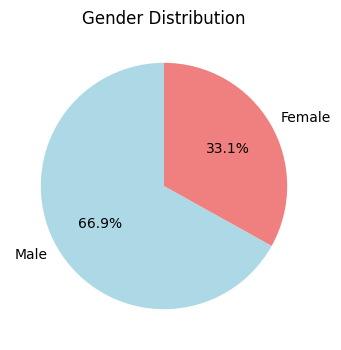

In [ ]:
# Pie chart for gender distribution
plt.figure(figsize=(4,4))
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

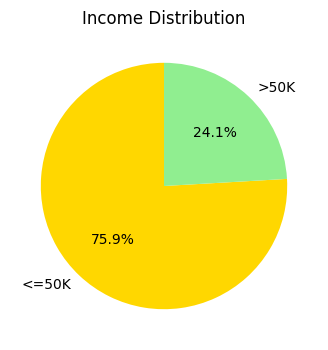

In [ ]:
# Pie chart for income distribution
plt.figure(figsize=(4,4))
income_counts = df['income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen'])
plt.title('Income Distribution')
plt.show()

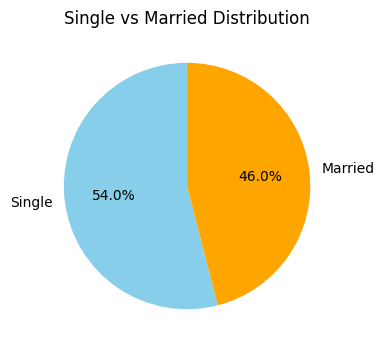

In [ ]:
# Categorize 'marital-status' into 'Single' and 'Married'
df['marital-category'] = df['marital-status'].apply(lambda x: 'Married' if x == 'Married-civ-spouse' else 'Single')

# Pie chart for Single vs Married
plt.figure(figsize=(4,4))
marital_counts = df['marital-category'].value_counts()
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Single vs Married Distribution')
plt.show()

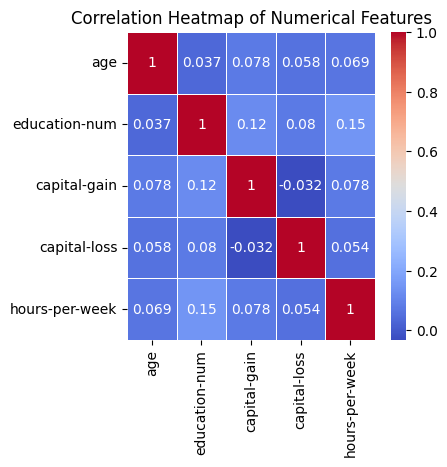

In [ ]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(4,4))

# Select numerical columns for correlation matrix
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Calculate correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

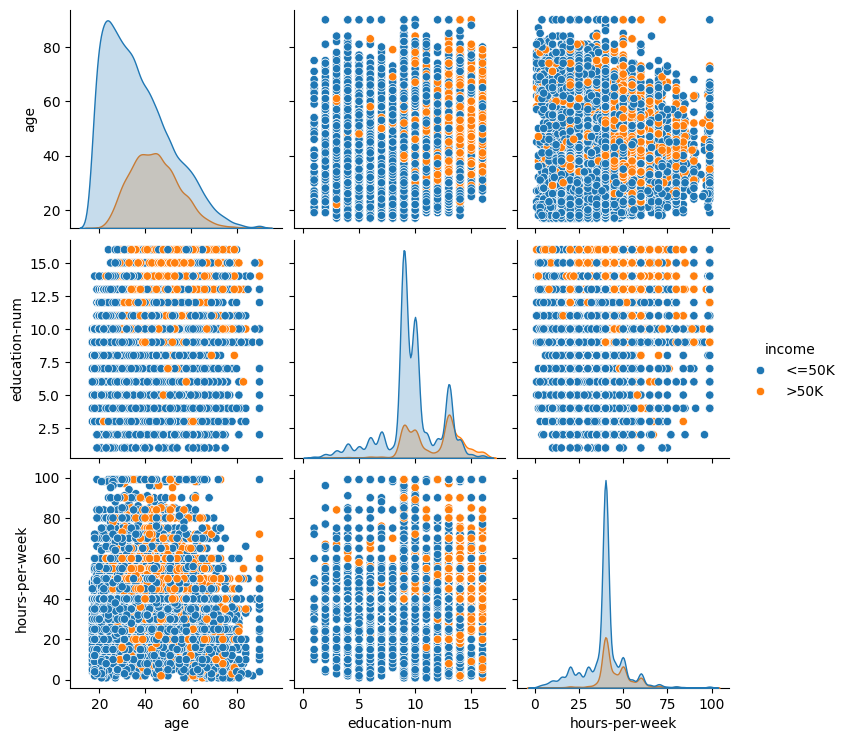

In [ ]:
sns.pairplot(df[['age', 'education-num', 'hours-per-week', 'income']], hue='income')
plt.show()

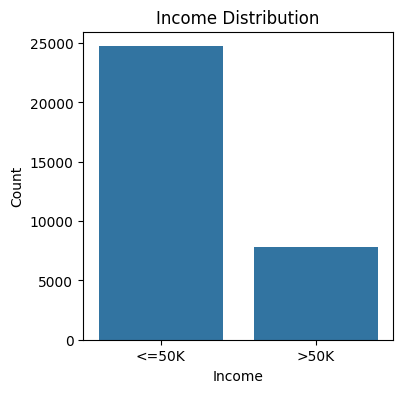

In [ ]:
# Count plot for 'income'
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='income')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

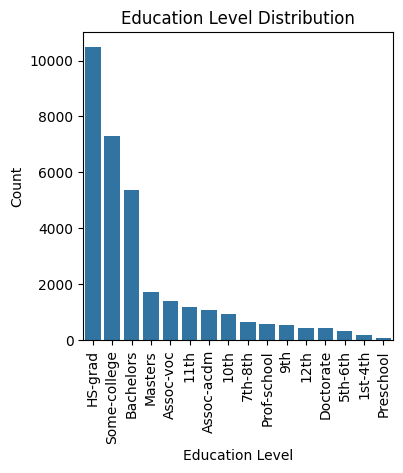

In [ ]:
# Count plot for 'education'
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [ ]:
df.replace('?', np.nan, inplace=True)
print(df['occupation'].isnull().sum())
df_cleaned = df.dropna(subset=['occupation'])
print(df['occupation'].isnull().sum())

1843
1843


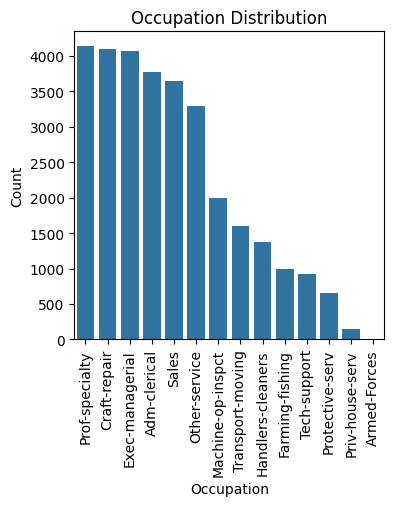

In [ ]:
# Count plot for 'occupation'
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='occupation', order=df['occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

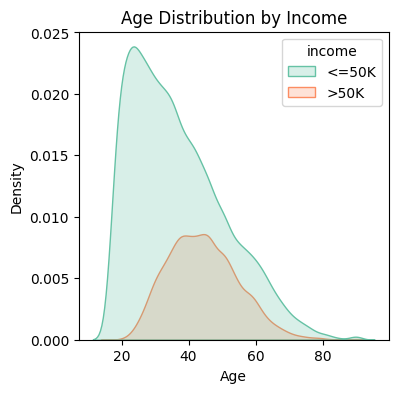

In [ ]:
# Density plot for 'age' by 'income'
plt.figure(figsize=(4,4))
sns.kdeplot(data=df, x='age', hue='income', fill=True, palette='Set2')
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

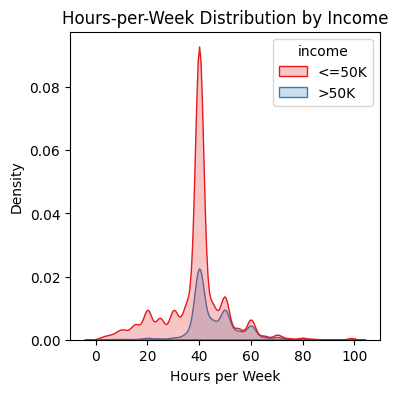

In [ ]:
# Density plot for 'hours-per-week' by 'income'
plt.figure(figsize=(4,4))
sns.kdeplot(data=df, x='hours-per-week', hue='income', fill=True, palette='Set1')
plt.title('Hours-per-Week Distribution by Income')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.show()

In [ ]:
# identifiers
quasi_identifiers = ['age', 'education', 'marital-status', 'race', 'sex', 'occupation', 'native-country']
personal_identifiers = ['fnlwgt']
sensitive_identifiers = ['income']

In [ ]:
identifier_types = {}

# Assign identifier types
for col in df.columns:
    if col in quasi_identifiers:
        identifier_types[col] = 'Quasi-Identifier (QI)'
    elif col in personal_identifiers:
        identifier_types[col] = 'Personal-Identifier (PI)'
    elif col in sensitive_identifiers:
        identifier_types[col] = 'Sensitive-Identifier (SI)'
    else:
        identifier_types[col] = 'Not a QI' # Assign a value for columns not in quasi_identifiers

# Create a new DataFrame showing the columns and their identifier types
df_identifiers = pd.DataFrame({
    'Column': df.columns,
    'Identifier_Type': [identifier_types[col] for col in df.columns]
})
df_identifiers

,Column,Identifier_Type
0,age,Quasi-Identifier (QI)
1,workclass,Not a QI
2,fnlwgt,Personal-Identifier (PI)
3,education,Quasi-Identifier (QI)
4,education-num,Not a QI
5,marital-status,Quasi-Identifier (QI)
6,occupation,Quasi-Identifier (QI)
7,relationship,Not a QI
8,race,Quasi-Identifier (QI)
9,sex,Quasi-Identifier (QI)


## **Attribute Disclosure Attack**

in this type of attack adversary knows certain quasi-identifiers (like age, race, and gender) but doesn't know a sensitive attribute (e.g., income).

In [ ]:
QI = ['age' , 'sex' , 'race']
SI = 'income'

# Group the dataset by quasi-identifiers and see how often each value of the sensitive attribute occurs
grouped = df.groupby(QI)[SI].value_counts(normalize=True).unstack()

grouped.head()

income                         <=50K  >50K
age sex    race                           
17  Female Amer-Indian-Eskimo    1.0   NaN
           Asian-Pac-Islander    1.0   NaN
           Black                 1.0   NaN
           Other                 1.0   NaN
           White                 1.0   NaN

In [ ]:
# Filter out groups where one income value is overwhelmingly dominant
# (e.g., more than 80% of the individuals in that group share the same 'income')
threshold = 0.8
dominant_groups = grouped[(grouped > threshold) | (grouped < 1 - threshold)].dropna()

print("\nPotential groups for attribute disclosure attack:")
dominant_groups.head()


Potential groups for attribute disclosure attack:


income               <=50K      >50K
age sex    race                     
19  Female White  0.996753  0.003247
    Male   White  0.996894  0.003106
21  Female Black  0.967742  0.032258
    Male   White  0.997093  0.002907
22  Female White  0.989362  0.010638

This suggests that if an attacker knows someone's age, sex, and race, they can make a highly accurate prediction about whether that person earns more or less than $50K.

In [ ]:
QI = ['age' , 'sex' , 'race']
SI = 'marital-status'

# Group the dataset by quasi-identifiers and see how often each value of the sensitive attribute occurs
grouped = df.groupby(QI)[SI].value_counts(normalize=True).unstack()

grouped.head()

marital-status                 Divorced  Married-AF-spouse  \
age sex    race                                              
17  Female Amer-Indian-Eskimo       NaN                NaN   
           Asian-Pac-Islander       NaN                NaN   
           Black                    NaN                NaN   
           Other                    NaN                NaN   
           White                    NaN                NaN   

marital-status                 Married-civ-spouse  Married-spouse-absent  \
age sex    race                                                            
17  Female Amer-Indian-Eskimo                 NaN                    NaN   
           Asian-Pac-Islander                 NaN                    NaN   
           Black                              NaN                    NaN   
           Other                              NaN                    NaN   
           White                         0.006173                    NaN   

marital-status                 Never-married  Separated  Widowed  
age sex    race                                                   
17  Female Amer-Indian-Eskimo       1.000000        NaN      NaN  
           Asian-Pac-Islander       1.000000        NaN      NaN  
           Black                    1.000000        NaN      NaN  
           Other                    1.000000        NaN      NaN  
           White                    0.993827        NaN      NaN

In [ ]:
threshold = 0.8
dominant_groups = grouped[(grouped > threshold) | (grouped < 1 - threshold)].dropna()

print("\nPotential groups for attribute disclosure attack:")
dominant_groups.head()


Potential groups for attribute disclosure attack:


,,marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
age,sex,race,,,,,,,
22,Female,White,0.024823,0.003546,0.053191,0.003546,0.886525,0.024823,0.003546
47,Male,White,0.093607,0.002283,0.826484,0.013699,0.050228,0.011416,0.002283


if someone is identified as a 22-year-old white female, there is a high likelihood that she is "Never-married," which reveals sensitive information about her personal life.

In [ ]:
QI = ['age' , 'sex' , 'race']
SI = ['occupation']

# Group the dataset by quasi-identifiers and see how often each value of the sensitive attribute occurs
grouped = df.groupby(QI)[SI].value_counts(normalize=True).unstack()

grouped.head()

occupation                     Adm-clerical  Armed-Forces  Craft-repair  \
age sex    race                                                           
17  Female Amer-Indian-Eskimo           NaN           NaN           NaN   
           Asian-Pac-Islander      1.000000           NaN           NaN   
           Black                   0.090909           NaN           NaN   
           Other                        NaN           NaN           NaN   
           White                   0.111111           NaN      0.014815   

occupation                     Exec-managerial  Farming-fishing  \
age sex    race                                                   
17  Female Amer-Indian-Eskimo              NaN              NaN   
           Asian-Pac-Islander              NaN              NaN   
           Black                           NaN              NaN   
           Other                           NaN              NaN   
           White                      0.007407              NaN   

occupation                     Handlers-cleaners  Machine-op-inspct  \
age sex    race                                                       
17  Female Amer-Indian-Eskimo                NaN                NaN   
           Asian-Pac-Islander                NaN                NaN   
           Black                        0.090909                NaN   
           Other                             NaN                NaN   
           White                        0.014815                NaN   

occupation                     Other-service  Priv-house-serv  Prof-specialty  \
age sex    race                                                                 
17  Female Amer-Indian-Eskimo       1.000000              NaN             NaN   
           Asian-Pac-Islander            NaN              NaN             NaN   
           Black                    0.363636              NaN             NaN   
           Other                         NaN              NaN        0.500000   
           White                    0.355556         0.044444        0.022222   

occupation                     Protective-serv     Sales  Tech-support  \
age sex    race                                                          
17  Female Amer-Indian-Eskimo              NaN       NaN           NaN   
           Asian-Pac-Islander              NaN       NaN           NaN   
           Black                           NaN  0.454545           NaN   
           Other                           NaN  0.500000           NaN   
           White                      0.014815  0.407407           NaN   

occupation                     Transport-moving  
age sex    race                                  
17  Female Amer-Indian-Eskimo               NaN  
           Asian-Pac-Islander               NaN  
           Black                            NaN  
           Other                            NaN  
           White                       0.007407

In [ ]:
threshold = 0.8
dominant_groups = grouped[(grouped > threshold) | (grouped < 1 - threshold)].dropna()

print("\nPotential groups for attribute disclosure attack:")
dominant_groups.head()


Potential groups for attribute disclosure attack:


,,occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
age,sex,race,,,,,,,,,,,,,,
23,Male,White,0.091584,0.00495,0.163366,0.071782,0.029703,0.128713,0.074257,0.106436,0.00495,0.081683,0.014851,0.128713,0.034653,0.064356


can be used to accurately predict a person's occupation, which poses a risk for privacy breaches and attribute disclosure attacks

# Stastical Inference Attack

The emphasis here is more on the process of using statistical methods to analyze the dataset and derive conclusions, which can lead to revealing sensitive information indirectly.

In [ ]:
features = ['age', 'sex', 'race', 'native-country', 'occupation', 'hours-per-week']
sensitive_attribute = 'income'

# Encode categorical variables
label_encoder = LabelEncoder()
df[sensitive_attribute] = label_encoder.fit_transform(df[sensitive_attribute])  # Encode income
for col in features:
    df[col] = label_encoder.fit_transform(df[col])

X = df[features]
y = df[sensitive_attribute]

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Train a Logistic Regression model to perform statistical inference attack
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

y_pred = logistic_model.predict(X_test)
print(y_pred)
print("Accuracy for statistical inference attack on income:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

income_labels = label_encoder.fit(['<=50K', '>50K'])
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

predictions_df = pd.DataFrame({'Actual Income': y_test_labels, 'Predicted Income': y_pred_labels})
print("\nPredictions (Actual vs Predicted):")
predictions_df.head(10)

[0 0 0 ... 0 0 0]
Accuracy for statistical inference attack on income: 0.7594431364520422

Predictions (Actual vs Predicted):


,Actual Income,Predicted Income
0,<=50K,<=50K
1,<=50K,<=50K
2,>50K,<=50K
3,<=50K,<=50K
4,<=50K,<=50K
5,>50K,<=50K
6,>50K,>50K
7,<=50K,<=50K
8,<=50K,<=50K
9,>50K,<=50K


In [ ]:
predicted_distribution = pd.Series(y_pred_labels).value_counts()
print("\nPredicted Income Distribution:")
predicted_distribution


Predicted Income Distribution:


,count
<=50K,8993
>50K,776


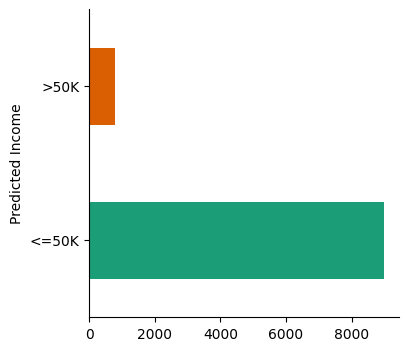

In [ ]:
plt.figure(figsize=(4,4))
predictions_df.groupby('Predicted Income').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Analyze the distribution of predicted incomes to understand the overall prediction pattern.

# Differential Privacy Breach

analyze whether the mechanism effectively protects sensitive attributes, & try to reverse-engineer or decompose the mechanism to see if you can recover sensitive information.

In [ ]:
# Encode the income labels
label_encoder_income = LabelEncoder()
df['income'] = label_encoder_income.fit_transform(df['income'])

# Define the query function with differential privacy (Laplace mechanism)
def query_average_age(df, epsilon):
    true_average_age = df[df['income'] == 1]['age'].mean()
    sensitivity = 1
    noise = np.random.laplace(loc=0, scale=sensitivity/epsilon)
    return true_average_age + noise

epsilon = 0.5

In [ ]:
# trying to find the sensitive information
age_group = 30  # Interested in people aged 30

epsilon = 10  # Set a weak epsilon to simulate a potential breach
dp_average_age = query_average_age(df, epsilon)
print(f"DP Average Age for people earning >50K: {dp_average_age:.2f}")

# The attacker compares this noisy result with known distributions
known_distribution = df[df['age'] == age_group]['income'].value_counts(normalize=True)
print(f"Known Income Distribution for age {age_group}: {known_distribution}")


DP Average Age for people earning >50K: 27.21
Known Income Distribution for age 30: income
0    0.59322
1    0.40678
Name: proportion, dtype: float64


In [ ]:
dp_average_age = query_average_age(df, epsilon)
print(f"Differentially Private Average Age of individuals earning >50K: {dp_average_age:.2f}")

subset_ages = df[df['income'] == 1]['age'].sample(10, random_state=42)  # Sample ages of individuals earning >50K

sampled_average_age = subset_ages.mean()

# Attempt to reverse-engineer the average age
print(f"Sampled Average Age from individuals earning >50K: {sampled_average_age:.2f}")

print(f"Difference between sampled average and DP average: {abs(dp_average_age - sampled_average_age):.2f}")

Differentially Private Average Age of individuals earning >50K: 27.12
Sampled Average Age from individuals earning >50K: 32.50
Difference between sampled average and DP average: 5.38


In [ ]:
epsilon_values = [0.1, 0.5, 1, 2, 5]

# Test the effect of different epsilon values on DP average age
for epsilon in epsilon_values:
    dp_average_age = query_average_age(df, epsilon)
    print(f"Epsilon: {epsilon}, DP Average Age: {dp_average_age:.2f}, Difference: {abs(dp_average_age - sampled_average_age):.2f}")

Epsilon: 0.1, DP Average Age: 35.59, Difference: 3.09
Epsilon: 0.5, DP Average Age: 27.20, Difference: 5.30
Epsilon: 1, DP Average Age: 25.98, Difference: 6.52
Epsilon: 2, DP Average Age: 27.45, Difference: 5.05
Epsilon: 5, DP Average Age: 27.44, Difference: 5.06


High epsilon (e.g., 5): Weaker privacy, higher risk of revealing sensitive information.

# Query Based Attack

infer sensitive information by running multiple queries on different subsets of data and analyzing the patterns in the results. Even with anonymized or aggregated data, attackers can sometimes uncover private details by carefully choosing their queries.

In [ ]:
df.describe()

,age,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,21.580326,1.897784e+05,10.080679,6.421762,3.665858,0.669205,1077.648844,87.303830,39.377937,36.470870,0.240810
std,13.635502,1.055500e+05,2.572720,4.328619,0.848806,0.470506,7385.292085,402.960219,12.144006,6.083092,0.427581
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,1.178270e+05,9.000000,3.000000,4.000000,0.000000,0.000000,0.000000,39.000000,38.000000,0.000000
50%,20.000000,1.783560e+05,10.000000,6.000000,4.000000,1.000000,0.000000,0.000000,39.000000,38.000000,0.000000
75%,31.000000,2.370510e+05,12.000000,10.000000,4.000000,1.000000,0.000000,0.000000,44.000000,38.000000,0.000000
max,72.000000,1.484705e+06,16.000000,14.000000,4.000000,1.000000,99999.000000,4356.000000,93.000000,41.000000,1.000000


In [ ]:
# Define a function to query based on a demographic group and return average income
def query_average_income_by_group(df, column, value):
    subset = df[df[column] == value]
    if len(subset) == 0:
        return None
    return subset['income'].value_counts(normalize=True) * 100

occupation_mapping = {0: 'Exec-managerial', 1: 'Craft-repair', 2: 'Other-service', 3: 'Sales'}
df['occupation'] = df['occupation'].map(occupation_mapping)

# Query the average income by occupation
occupations = df['occupation'].unique()
for occupation in occupations:
    result = query_average_income_by_group(df, 'occupation', occupation)
    print(f"Occupation: {occupation}")
    print(f"Income Distribution: \n{result}\n")

Occupation: Exec-managerial
Income Distribution: 
income
0    86.551724
1    13.448276
Name: proportion, dtype: float64

Occupation: Sales
Income Distribution: 
income
0    51.598623
1    48.401377
Name: proportion, dtype: float64

Occupation: nan
Income Distribution: 
None

Occupation: Other-service
Income Distribution: 
income
0    77.335936
1    22.664064
Name: proportion, dtype: float64

Occupation: Craft-repair
Income Distribution: 
income
0    88.888889
1    11.111111
Name: proportion, dtype: float64



In [ ]:
# Query the average income by age group
age_groups = [(20, 30), (31, 40), (41, 50), (51, 60)]
for age_group in age_groups:
    subset = df[(df['age'] >= age_group[0]) & (df['age'] <= age_group[1])]
    result = subset['income'].value_counts(normalize=True) * 100
    print(f"Age Group: {age_group}")
    print(f"Income Distribution: \n{result}\n")

Age Group: (20, 30)
Income Distribution: 
income
0    63.873305
1    36.126695
Name: proportion, dtype: float64

Age Group: (31, 40)
Income Distribution: 
income
0    61.075358
1    38.924642
Name: proportion, dtype: float64

Age Group: (41, 50)
Income Distribution: 
income
0    70.255183
1    29.744817
Name: proportion, dtype: float64

Age Group: (51, 60)
Income Distribution: 
income
0    81.041968
1    18.958032
Name: proportion, dtype: float64



In [ ]:
# Query the average income by marital status
marital_statuses = df['marital-status'].unique()
for marital_status in marital_statuses:
    result = query_average_income_by_group(df, 'marital-status', marital_status)
    print(f"Marital Status: {marital_status}")
    print(f"Income Distribution: \n{result}\n")

Marital Status: Never-married
Income Distribution: 
income
0    95.403913
1     4.596087
Name: proportion, dtype: float64

Marital Status: Married-civ-spouse
Income Distribution: 
income
0    55.315171
1    44.684829
Name: proportion, dtype: float64

Marital Status: Divorced
Income Distribution: 
income
0    89.579113
1    10.420887
Name: proportion, dtype: float64

Marital Status: Married-spouse-absent
Income Distribution: 
income
0    91.866029
1     8.133971
Name: proportion, dtype: float64

Marital Status: Separated
Income Distribution: 
income
0    93.560976
1     6.439024
Name: proportion, dtype: float64

Marital Status: Married-AF-spouse
Income Distribution: 
income
0    56.521739
1    43.478261
Name: proportion, dtype: float64

Marital Status: Widowed
Income Distribution: 
income
0    91.440081
1     8.559919
Name: proportion, dtype: float64



# Clustering Attack

used to infer sensitive information from an anonymized dataset by grouping individuals based on shared characteristics.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

columns_to_cluster = ['age', 'education', 'occupation', 'marital-status', 'hours-per-week']

In [ ]:
label_encoders = {}
for column in columns_to_cluster:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Standardize the numerical values
scaler = StandardScaler()
df[columns_to_cluster] = scaler.fit_transform(df[columns_to_cluster])

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[columns_to_cluster])

for cluster in np.unique(df['cluster']):
    subset = df[df['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(subset['income'].value_counts(normalize=True) * 100)  # Show percentage of <=50K and >50K income
    print()

Cluster 0:
income
0    95.045344
1     4.954656
Name: proportion, dtype: float64

Cluster 1:
income
0    81.600109
1    18.399891
Name: proportion, dtype: float64

Cluster 2:
income
0    57.80492
1    42.19508
Name: proportion, dtype: float64

Cluster 3:
income
0    74.730487
1    25.269513
Name: proportion, dtype: float64



In [ ]:
for cluster in np.unique(df['cluster']):
    subset = df[df['cluster'] == cluster]
    avg_age = subset['age'].mean()
    occupation_counts = subset['occupation'].value_counts()
    print(f"Cluster {cluster} - Average Age: {avg_age}, Top Occupations: {occupation_counts.head(3)}")

Cluster 0 - Average Age: -0.8491365282635592, Top Occupations: occupation
 0.676420    8165
-0.256444     782
-1.189307      95
Name: count, dtype: int64
Cluster 1 - Average Age: -0.11075185891911928, Top Occupations: occupation
-2.122170    3725
-1.189307    3597
-3.055034       9
Name: count, dtype: int64
Cluster 2 - Average Age: 0.1483726301376648, Top Occupations: occupation
 0.676420    8780
-0.256444    2660
-1.189307     104
Name: count, dtype: int64
Cluster 3 - Average Age: 1.4613335996419745, Top Occupations: occupation
 0.676420    3672
-0.256444     618
-1.189307     303
Name: count, dtype: int64


The clusters represent groups of individuals based on age and occupations. Clusters with negative average ages suggest younger individuals, while clusters with positive average ages represent older groups. The top occupations vary across clusters, showing that different age groups tend to have distinct occupation patterns.

# Detection Using Machine Learning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

features = df.drop('income', axis=1)
X = features.values

# Split the data (for training and testing)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
# Anomaly Detection using Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

In [ ]:
# Predict anomalies
predictions = model.predict(X_test)

# Convert predictions to a binary format (1 for normal, -1 for anomaly)
anomalies = [1 if x == -1 else 0 for x in predictions]

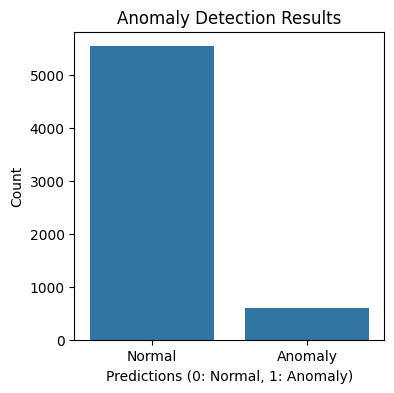

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x=anomalies)
plt.title("Anomaly Detection Results")
plt.xlabel("Predictions (0: Normal, 1: Anomaly)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Normal', 'Anomaly'])
plt.show()

# What is Linkage Attack ??

In [ ]:
sensitive_data = pd.DataFrame({
    'age': [25, 30, 45, 50],
    'sex': ['Male', 'Female', 'Male', 'Female'],
    'race': ['White', 'White', 'Black', 'White'],
    'occupation': ['Tech-support', 'Exec-managerial', 'Craft-repair', 'Sales'],
    'medical_condition': ['Diabetes', 'Hypertension', 'Heart Disease', 'Asthma']
})

# View the sensitive information dataset
sensitive_data

,age,sex,race,occupation,medical_condition
0,25,Male,White,Tech-support,Diabetes
1,30,Female,White,Exec-managerial,Hypertension
2,45,Male,Black,Craft-repair,Heart Disease
3,50,Female,White,Sales,Asthma


In [ ]:
linked_data = pd.merge(sensitive_data, df_cleaned , how='inner', on=['age', 'sex', 'race', 'occupation'])
# View the linked dataset, including sensitive information from both datasets
linked_data[['age', 'sex', 'race', 'occupation', 'medical_condition', 'income']]

,age,sex,race,occupation,medical_condition,income
0,25,Male,White,Tech-support,Diabetes,<=50K
1,25,Male,White,Tech-support,Diabetes,<=50K
2,25,Male,White,Tech-support,Diabetes,<=50K
3,25,Male,White,Tech-support,Diabetes,<=50K
4,25,Male,White,Tech-support,Diabetes,<=50K
5,25,Male,White,Tech-support,Diabetes,<=50K
6,25,Male,White,Tech-support,Diabetes,<=50K
7,25,Male,White,Tech-support,Diabetes,<=50K
8,25,Male,White,Tech-support,Diabetes,>50K
9,25,Male,White,Tech-support,Diabetes,<=50K


# Detection of Linkage Attack using Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# can be used for linking
quasi_identifiers = ['age', 'sex', 'education', 'marital-status', 'race', 'occupation', 'hours-per-week', 'native-country']
sensitive_attribute = 'income'

X = df[quasi_identifiers]
y = df[sensitive_attribute]

In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8003905402473421

**If the model achieves high accuracy in predicting the sensitive attribute (income) using the quasi-identifiers, this suggests a potential vulnerability to linkage attacks.**

# Applying K-anonymity

In [ ]:
quasi_identifiers = ['age', 'sex', 'race', 'education', 'marital-status']

In [ ]:
# Generalize 'age' by binning into ranges (e.g., 10-year bins)
df['age_binned'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])

generalized_quasi_identifiers = ['age_binned', 'sex', 'race', 'education', 'marital-status']

In [ ]:
# Group the data by the quasi-identifiers and count group sizes
grouped_data = df.groupby(generalized_quasi_identifiers).size().reset_index(name='group_size')

<ipython-input-57-0b0ddb8bae80>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(generalized_quasi_identifiers).size().reset_index(name='group_size')


In [ ]:
# Apply K-Anonymity with k=10
k = 10
k_anonymized_data = grouped_data[grouped_data['group_size'] >= k]

# Merge the k-anonymized data back with the original dataset
final_data = pd.merge(df, k_anonymized_data, on=generalized_quasi_identifiers, how='inner')

In [ ]:
print("\nK-Anonymized Data Sample (k=5):\n", final_data[generalized_quasi_identifiers + ['group_size']].head())

print(f"\nTotal records before K-Anonymization: {len(df)}")
print(f"Total records after K-Anonymization (k=5): {len(final_data)}")


K-Anonymized Data Sample (k=5):
   age_binned  sex  race  education  marital-status  group_size
0        <30    1     4  -0.335437        0.921634         133
1        <30    1     4  -0.335437       -0.406212        1337
2        <30    1     2  -2.402511       -0.406212          13
3        <30    1     4   0.181332       -0.406212        2137
4        <30    1     4  -0.335437       -0.406212        1337

Total records before K-Anonymization: 30725
Total records after K-Anonymization (k=5): 13183


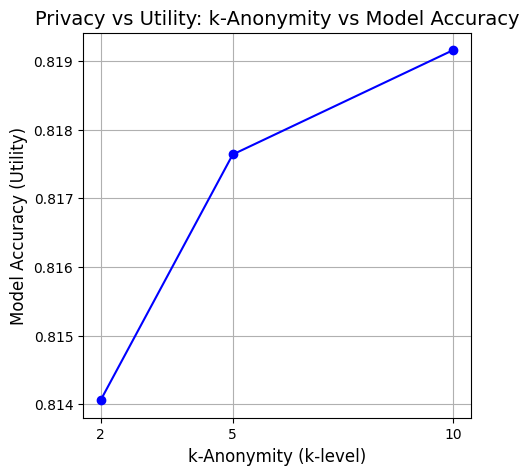

k = 10
Accuracy: 0.8191581688001736, Precision: 0.6679184549356223, Recall: 0.5429568251199303, F1: 0.5989896560019244
    k  accuracy  precision    recall  f1_score
0  10  0.819158   0.667918  0.542957   0.59899


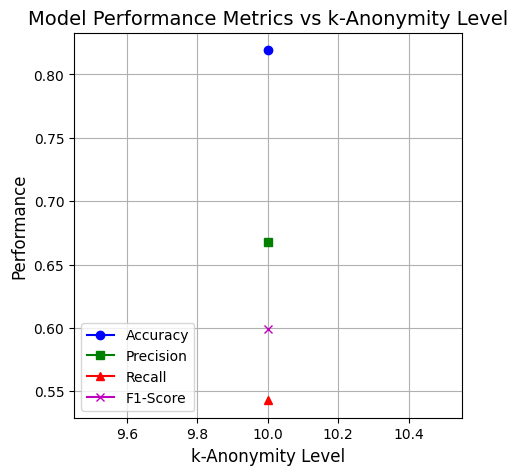

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.get_dummies(df, drop_first=True)
le = LabelEncoder()
df_encoded[sensitive_attribute] = le.fit_transform(df['income'])

def anonymize_data_k_anonymity(df, k_level):
    df_copy = df.copy()
    df_copy['age'] = pd.cut(df_copy['age'], bins=k_level, labels=False)
    return df_copy

k_values = [2, 5, 10]
accuracy_scores = []
performance_metrics = []

# Iterate over different levels of k-anonymity
for k in k_values:
    anonymized_df = anonymize_data_k_anonymity(df_encoded, k)

    X = anonymized_df[quasi_identifiers]
    y = anonymized_df[sensitive_attribute]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)


    accuracy_scores.append(accuracy)

# Plot Privacy (k-anonymity level) vs Utility (Accuracy)
plt.figure(figsize=(5,5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Privacy vs Utility: k-Anonymity vs Model Accuracy', fontsize=14)
plt.xlabel('k-Anonymity (k-level)', fontsize=12)
plt.ylabel('Model Accuracy (Utility)', fontsize=12)
plt.grid(True)
plt.xticks(k_values)
plt.show()


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

    # Print debugging information
print(f"k = {k}")
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")

    # Store the metrics for this k-level
performance_metrics.append({
        'k': k,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Convert performance metrics to DataFrame for better visualization
performance_df = pd.DataFrame(performance_metrics)

# Display the performance metrics for each k-anonymity level
print(performance_df)

# Optionally, plot the performance metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(performance_df['k'], performance_df['accuracy'], marker='o', label='Accuracy', color='b')
plt.plot(performance_df['k'], performance_df['precision'], marker='s', label='Precision', color='g')
plt.plot(performance_df['k'], performance_df['recall'], marker='^', label='Recall', color='r')
plt.plot(performance_df['k'], performance_df['f1_score'], marker='x', label='F1-Score', color='m')

plt.title('Model Performance Metrics vs k-Anonymity Level', fontsize=14)
plt.xlabel('k-Anonymity Level', fontsize=12)
plt.ylabel('Performance', fontsize=12)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


# importance of features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Encode categorical features for the model
for col in df_cleaned[quasi_identifiers]:
    if df_cleaned[col].dtype == 'object':
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Define the sensitive attribute (income)
sensitive_attribute = 'income'
df_cleaned[sensitive_attribute] = LabelEncoder().fit_transform(df_cleaned[sensitive_attribute])

<ipython-input-62-68c9272ec6e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-62-68c9272ec6e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-62-68c9272ec6e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
X = df_cleaned[quasi_identifiers]
y = df_cleaned[sensitive_attribute]  # Predicting risk of re-identification based on income

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier to detect re-identification risk
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8028


In [ ]:
importance = clf.feature_importances_
feature_importance = pd.DataFrame({'feature': quasi_identifiers, 'importance': importance})
print("\nFeature Importance:\n", feature_importance.sort_values(by='importance', ascending=False))


Feature Importance:
           feature  importance
4  marital-status    0.428179
3       education    0.268176
0             age    0.232134
2            race    0.049270
1             sex    0.022240


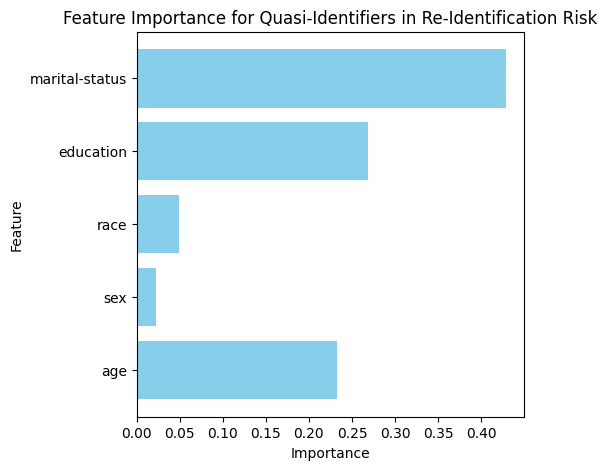

In [ ]:
plt.figure(figsize=(5,5))
plt.barh(quasi_identifiers, importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Quasi-Identifiers in Re-Identification Risk')
plt.show()

**L - diversity**

In [ ]:
grouped_data = df.groupby(generalized_quasi_identifiers)
# Define L-diversity condition: each group must have at least l diverse values for the sensitive attribute
l = 2  # Specify the value of l (for L-Diversity)

def check_l_diversity(group, l, sensitive_attr):
    """
    Check if the group satisfies l-diversity by ensuring that there are at least
    l diverse values for the sensitive attribute.
    """
    # Count the number of unique values in the sensitive attribute for the group
    unique_values = group[sensitive_attr].nunique()
    return unique_values >= l

# Filter the groups that satisfy L-Diversity
l_diverse_groups = [group for _, group in grouped_data if check_l_diversity(group, l, sensitive_attribute)]

# Combine the groups that satisfy L-Diversity into a final dataset
final_l_diverse_data = pd.concat(l_diverse_groups)

print(f"\nTotal records before L-Diversity: {len(df)}")
print(f"Total records after L-Diversity (l={l}): {len(final_l_diverse_data)}")

print("\nL-Diverse Data Sample:\n", final_l_diverse_data[generalized_quasi_identifiers + [sensitive_attribute]].head())


Total records before L-Diversity: 30725
Total records after L-Diversity (l=2): 13053

L-Diverse Data Sample:
       age_binned  sex  race  education  marital-status  income
3879         <30    0     1  -1.627358       -0.406212       1
8282         <30    0     1  -1.627358       -0.406212       0
21798        <30    0     1  -1.627358       -0.406212       0
2003         <30    0     1  -1.110590       -0.406212       1
9067         <30    0     1  -1.110590       -0.406212       0


<ipython-input-66-1998119b6e8a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(generalized_quasi_identifiers)


In [ ]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(final_l_diverse_data[quasi_identifiers], final_l_diverse_data[sensitive_attribute], test_size=0.3, random_state=42)
model.fit(X_train_l, y_train_l)
y_pred_l = model.predict(X_test_l)
accuracy_after_l_diversity = accuracy_score(y_test_l, y_pred_l)
accuracy_after_l_diversity

0.36414708886619

# Comparison before and post anonymization

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np


df_encoded = pd.get_dummies(df, drop_first=True)
le = LabelEncoder()
df_encoded[sensitive_attribute] = le.fit_transform(df[sensitive_attribute])

def anonymize_data_k_anonymity(df, k_level):
    df_copy = df.copy()
    df_copy['age'] = pd.cut(df_copy['age'], bins=k_level, labels=False)
    return df_copy

X = df_encoded[quasi_identifiers]
y = df_encoded[sensitive_attribute]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred)

print(f"Accuracy before anonymization: {accuracy_before}")

k_values = [2, 5, 10, 20, 50, 60]
accuracy_after_anonymization = []


for k in k_values:
    anonymized_df = anonymize_data_k_anonymity(df_encoded, k)

    X_anonymized = anonymized_df[quasi_identifiers]

    X_train_anonymized, X_test_anonymized, y_train, y_test = train_test_split(X_anonymized, y, test_size=0.3, random_state=42)

    clf.fit(X_train_anonymized, y_train)
    y_pred_anonymized = clf.predict(X_test_anonymized)

    accuracy = accuracy_score(y_test, y_pred_anonymized)
    accuracy_after_anonymization.append(accuracy)

    print(f"Accuracy after anonymization with k={k}: {accuracy}")


Accuracy before anonymization: 0.8072249945758299
Accuracy after anonymization with k=2: 0.8140594489043176
Accuracy after anonymization with k=5: 0.8176394011716207
Accuracy after anonymization with k=10: 0.8191581688001736
Accuracy after anonymization with k=20: 0.8176394011716207
Accuracy after anonymization with k=50: 0.8071165111737905
Accuracy after anonymization with k=60: 0.8079843783901063


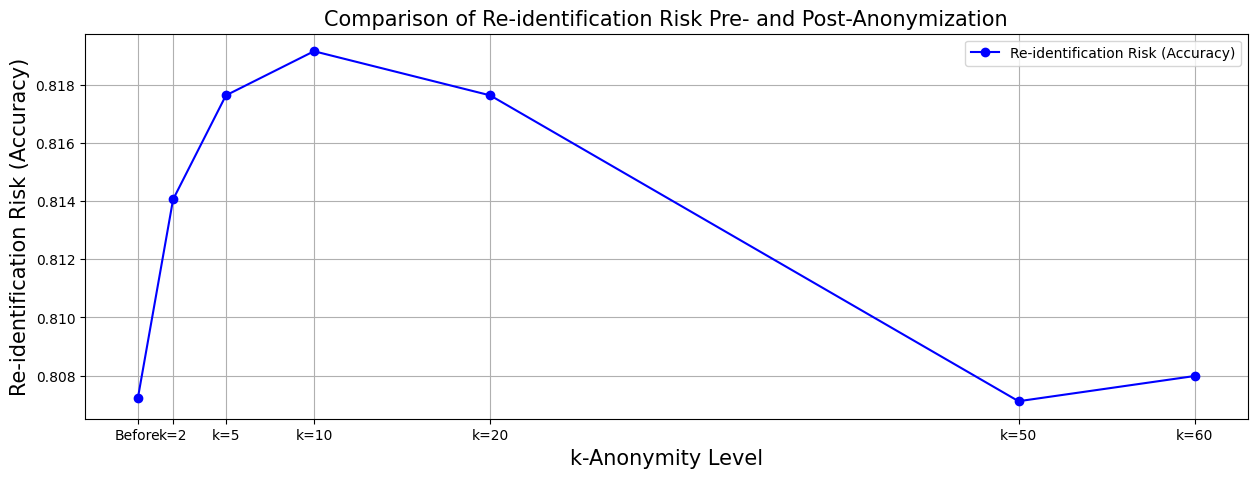

In [ ]:
plt.figure(figsize=(15 , 5))
plt.plot([0] + k_values, [accuracy_before] + accuracy_after_anonymization, marker='o', label='Re-identification Risk (Accuracy)', color='b')

plt.title('Comparison of Re-identification Risk Pre- and Post-Anonymization', fontsize=15)
plt.xlabel('k-Anonymity Level', fontsize=15)
plt.ylabel('Re-identification Risk (Accuracy)', fontsize=15)
plt.xticks([0] + k_values, labels=['Before'] + [f'k={k}' for k in k_values])
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

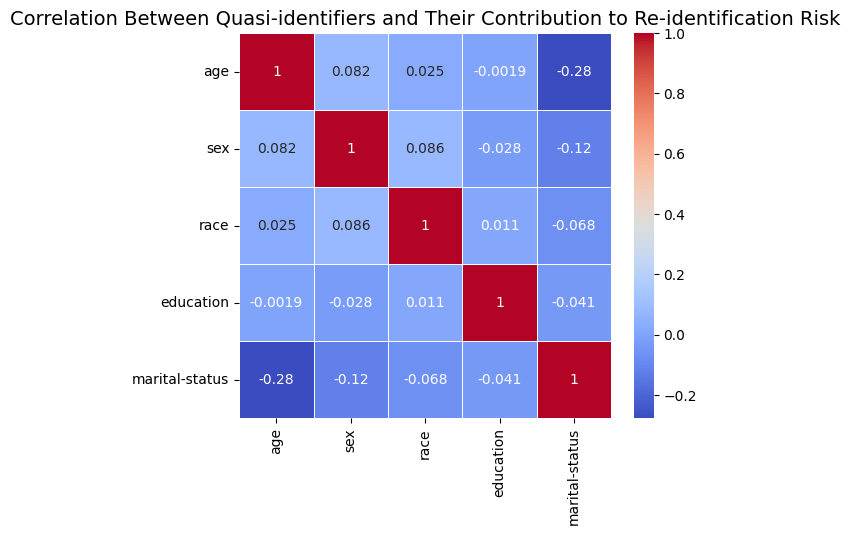

In [ ]:
df_encoded = pd.get_dummies(df[quasi_identifiers], drop_first=True)
correlation_matrix = df_encoded.corr()

# Plot a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Quasi-identifiers and Their Contribution to Re-identification Risk', fontsize=14)
plt.show()

Evaluation of attribute disclosure attack

In [ ]:
QI = ['age' , 'sex' , 'race']
SI = 'income'

# Group the dataset by quasi-identifiers and see how often each value of the sensitive attribute occurs
grouped = final_data.groupby(QI)[SI].value_counts(normalize=True).unstack()

# Filter out groups where one income value is overwhelmingly dominant
# (e.g., more than 80% of the individuals in that group share the same 'income')
threshold = 0.5
dominant_groups = grouped[(grouped > threshold) | (grouped < 1 - threshold)].dropna()

print("\nPotential groups for attribute disclosure attack:")
dominant_groups.head()


Potential groups for attribute disclosure attack:


income                    0         1
age      sex race                    
0.030778 0   2     0.902439  0.097561
             4     0.745763  0.254237
         1   1     0.357143  0.642857
             2     0.791667  0.208333
             4     0.575203  0.424797

In [ ]:
QI = ['age' , 'sex' , 'race']
SI = 'income'

# Group the dataset by quasi-identifiers and see how often each value of the sensitive attribute occurs
grouped = final_l_diverse_data.groupby(QI)[SI].value_counts(normalize=True).unstack()
# Filter out groups where one income value is overwhelmingly dominant
# (e.g., more than 80% of the individuals in that group share the same 'income')
threshold = 0.8
dominant_groups = grouped[(grouped > threshold) | (grouped < 1 - threshold)].dropna()

print("\nPotential groups for attribute disclosure attack:")
dominant_groups.head()


Potential groups for attribute disclosure attack:


income                    0         1
age      sex race                    
0.030778 0   1     0.833333  0.166667
             2     0.846154  0.153846
0.250796 0   2     0.807692  0.192308
0.397474 0   2     0.888889  0.111111
             4     0.823529  0.176471

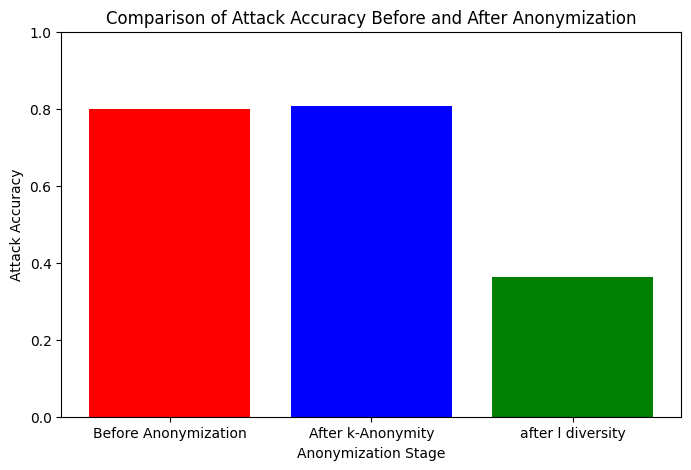

In [ ]:
import matplotlib.pyplot as plt

accuracy_before = 0.8003905402473421 # Attack accuracy before anonymization
accuracy_after_k_anonymity = 0.8079843783901063 # Attack accuracy after k-anonymity
accuracy_after_l_diversity = 0.36414708886619

# Labels and data for the bar chart
labels = ['Before Anonymization', 'After k-Anonymity' , 'after l diversity']
accuracies = [accuracy_before, accuracy_after_k_anonymity , accuracy_after_l_diversity]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['red', 'blue', 'green'])
plt.ylim(0, 1)  # Set the y-axis range for percentage scale

plt.xlabel("Anonymization Stage")
plt.ylabel("Attack Accuracy")
plt.title("Comparison of Attack Accuracy Before and After Anonymization")

plt.show()